In [13]:
import numpy as np
import matplotlib.pyplot as plt
import IPython as IP
from sklearn.decomposition import FastICA

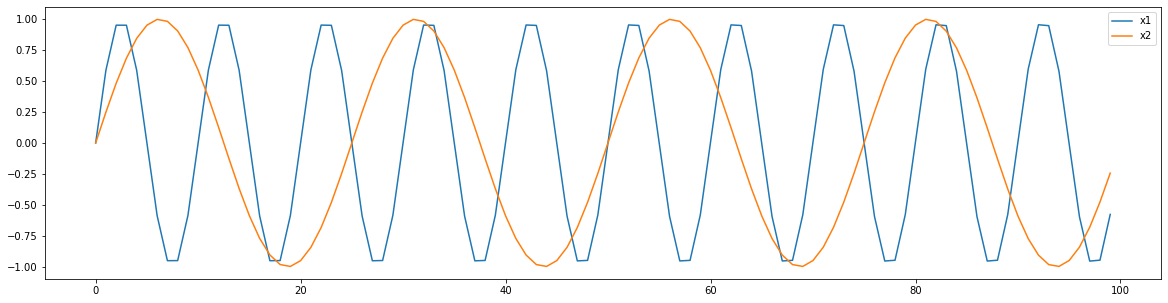

In [27]:
fs = 5000 #１秒間の要素数
duration = 1 #音源の継続時間(s)

#音声生成
f1 = 500 #Hz
f2 = 200 #Hz

t = np.linspace(0., duration, int(fs * duration))  # ( start, stop, num of data )
x1 = np.sin(f1 * (2. * np.pi) * t)
x2 = np.sin(f2 * (2. * np.pi) * t)

plt.figure(figsize=(20,5))
plt.plot(x1[:100], label="x1")
plt.plot(x2[:100], label="x2")
plt.legend()
plt.show()

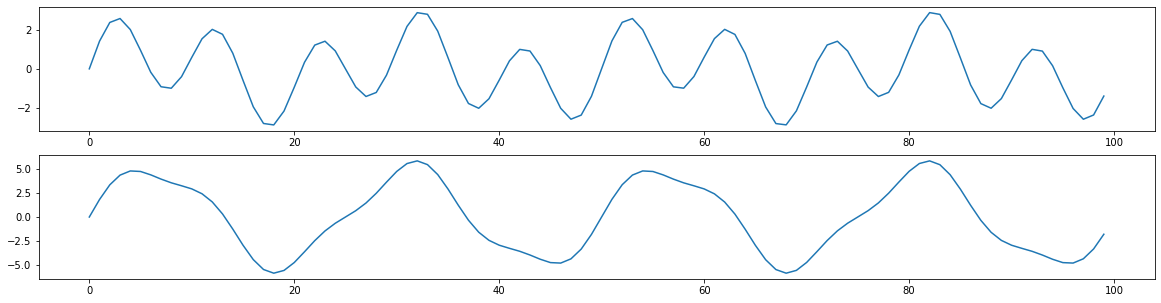

In [28]:
#Linear Mixture

x_mix1 = 2*x1 + x2
x_mix2 = x1 + x2*5

plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
plt.plot(x_mix1[:100])
plt.subplot(2,1,2)
plt.plot(x_mix2[:100])

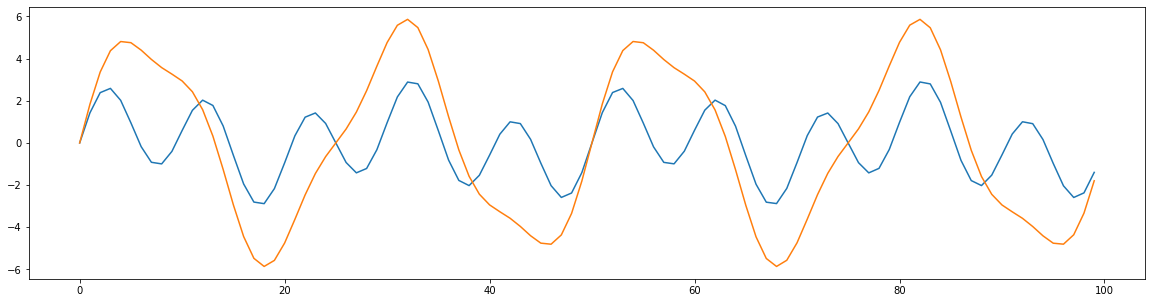

In [31]:
X = np.concatenate((x_mix1.reshape(-1,1), x_mix2.reshape(-1,1)), 1) #混合信号を２つのマイクで観測している
plt.figure(figsize=(20,5))
plt.plot(X[:100])

In [32]:
#FastICA
transformer = FastICA(n_components=2, random_state=0)
X_transformed = transformer.fit_transform(X)

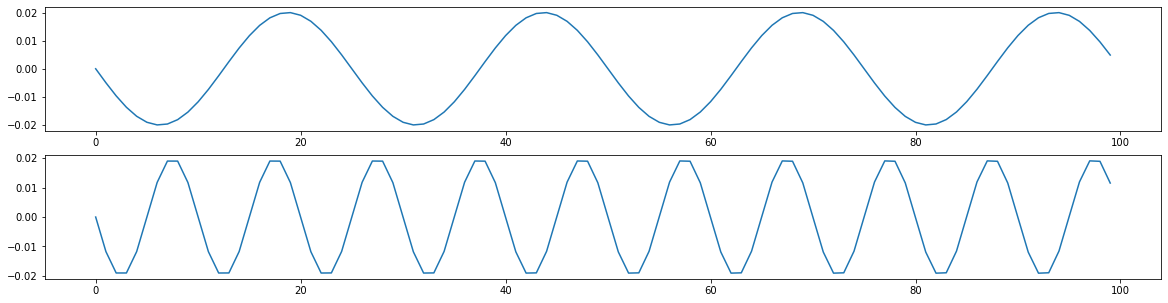

In [33]:
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
plt.plot(X_transformed[:,0][:100])
plt.subplot(2,1,2)
plt.plot(X_transformed[:,1][:100])